In [1]:
# import
import numpy as np
import pandas as pd

import xgboost as xgb

%matplotlib inline
import matplotlib.pyplot as plt

from xgboost_visualizer import *

In [2]:
# load data
dtrain = xgb.DMatrix("data/train.libsvm")
dtest = xgb.DMatrix("data/test.libsvm")

[13:03:34] 12000x9 matrix with 108000 entries loaded from data/train.libsvm
[13:03:34] 2999x9 matrix with 26991 entries loaded from data/test.libsvm


In [3]:
# train data label distrubtion
print("Train label distribution:", dtrain.get_label().sum() / dtrain.get_label().size)

# test data label distrubtion
print("Train label distribution:", dtest.get_label().sum() / dtest.get_label().size)

Train label distribution: 0.23783333333333334
Train label distribution: 0.23907969323107703


In [4]:
# define parameters
params = {
    "objective": "binary:logistic",
    "silent": 1,
    "eval_metric": "auc"
}

watchlist = [(dtrain, 'train'), (dtest, 'eval')]

In [5]:
# train model
xgb_trained = xgb.train(params, dtrain, 50, watchlist)

[0]	train-auc:0.886794	eval-auc:0.881745
[1]	train-auc:0.898009	eval-auc:0.887637
[2]	train-auc:0.908018	eval-auc:0.895209
[3]	train-auc:0.913157	eval-auc:0.897542
[4]	train-auc:0.916913	eval-auc:0.897553
[5]	train-auc:0.920597	eval-auc:0.901308
[6]	train-auc:0.924696	eval-auc:0.904203
[7]	train-auc:0.926771	eval-auc:0.90488
[8]	train-auc:0.928893	eval-auc:0.905824
[9]	train-auc:0.930563	eval-auc:0.90824
[10]	train-auc:0.932033	eval-auc:0.909653
[11]	train-auc:0.933475	eval-auc:0.910952
[12]	train-auc:0.934853	eval-auc:0.91125
[13]	train-auc:0.936429	eval-auc:0.912229
[14]	train-auc:0.936603	eval-auc:0.913077
[15]	train-auc:0.937018	eval-auc:0.913533
[16]	train-auc:0.937963	eval-auc:0.913971
[17]	train-auc:0.93907	eval-auc:0.916046
[18]	train-auc:0.939861	eval-auc:0.916191
[19]	train-auc:0.940736	eval-auc:0.916247
[20]	train-auc:0.941288	eval-auc:0.917188
[21]	train-auc:0.942817	eval-auc:0.917256
[22]	train-auc:0.943014	eval-auc:0.917674
[23]	train-auc:0.943805	eval-auc:0.917472
[24]	t

In [6]:
# define feature list
features = ["satisfaction_level",
            "last_evaluation",
            "number_project",
            "average_montly_hours",
            "time_spend_company",
            "work_accident",
            "promotion_last_5years",
            "sales",
            "salary"]

[0.03118302]
Final logit contribution: -3.436201676579, predicted probability: 0.03118302986210538


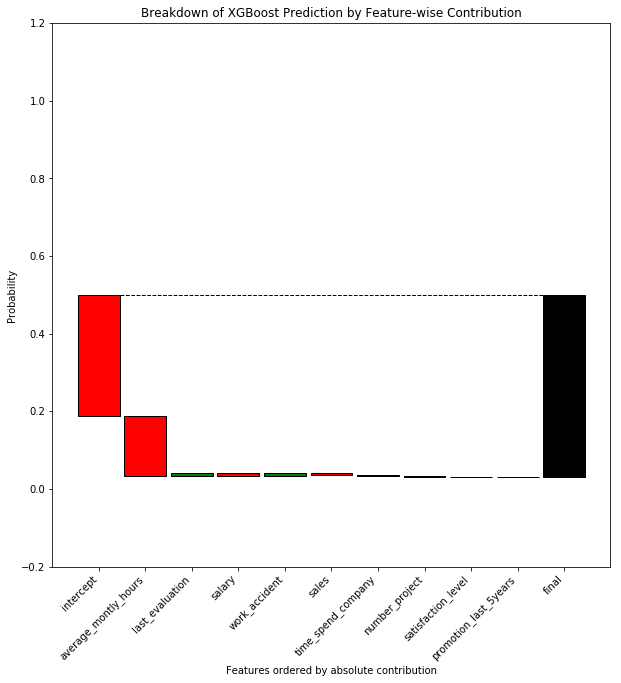

In [7]:
# get a sample
sample = dtest.slice([0])

# model prediction
print(xgb_trained.predict(sample))

# visualize the feature contribution
plt.figure(figsize=(10,10))
plot_contribution(xgb_trained, sample, features)

[0.49110422]
Final logit contribution: -0.03558703464999939, predicted probability: 0.4911041801506609


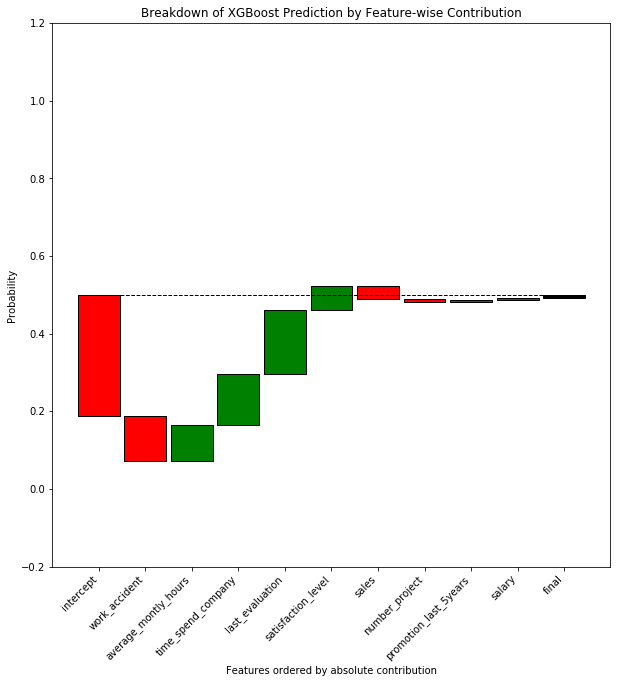

In [8]:
# get another sample
sample = dtest.slice([1])

# model prediction
print(xgb_trained.predict(sample))

# visualize the feature contribution
plt.figure(figsize=(10,10))
plot_contribution(xgb_trained, sample, features);